In [1]:
import pandas as pd
import ast
import os
from pprint import pprint
import matplotlib.pyplot as plt
from auxiliar_func import *

In [2]:
d = pd.read_csv('../Census-Income-KDD.csv')
d.shape

(199523, 42)

In [3]:
# shows the N best params for all the models
N = 5
METRIC = 'f1_macro'
ignore_keys = ['random_seed', 'random_state', 'verbose', 'cat_features', 'dual']
for file in os.listdir('./results'):
    if file.endswith('.csv') and file.startswith('results_'):
        print('='*20+file+'='*20)
        df = read_results('./results/'+file)
        df.sort_values(by=[METRIC], inplace=True, ascending=False)
        res_metric = pd.DataFrame(df[METRIC][:N])
        prep_p = pd.DataFrame(df['prep_param'][:N])
        mod_p = pd.DataFrame(df['model_param'][:N])

        prep_p, mod_p = expand_dicts(prep_p), expand_dicts(mod_p)
        for key in ignore_keys:
            if key in mod_p.columns:
                mod_p.drop(columns=[key], inplace=True)
        print('Best results:')
        print(res_metric.T)
        print('Preprocessing best params:')
        print(prep_p.T)
        print('Model best params:')
        print(mod_p.T)

====================results_catboost.csv====================
Best results:
                 0         1         2         3         4
f1_macro  0.799865  0.799865  0.799297  0.799297  0.799214
Preprocessing best params:
                          0       1       2       3       4
scaling                None    None    None    None    None
imputation             mode    mode    mode    mode    mode
cat_age               False   False   False   False   False
remove_outliers       False   False   False   False   False
merge_capital         False   False   False   False   False
downsampling_method  random  random  random  random  random
target_freq            0.85    0.85    0.85    0.85    0.85
generate_dummies      False   False   False   False   False
remove_duplicates      True    True    True    True    True
Model best params:
                     0        1        2        3        4
iterations         750      750      500      500      500
depth                6        6        6   

In [4]:
best_prep_par = pd.DataFrame()
ignore_keys = ['imputation', 'downsampling_method', 'remove_duplicates']

for file in os.listdir('./results'):
    if file.endswith('.csv') and file.startswith('results_'):
        # add the best preprocessing params for each model with the model name as index
        df = read_results('./results/'+file)
        df.sort_values(by=[METRIC], inplace=True, ascending=False)
        mod_name = file.split('_')[1].split('.')[0]
        prep_p = pd.DataFrame(df['prep_param'][:1])
        

        prep_p = expand_dicts(prep_p)
        prep_p.index = [mod_name]
        best_prep_par = pd.concat([best_prep_par, prep_p], axis=0)

# delete the columns that are not relevant for the analysis
for key in ignore_keys:
    if key in best_prep_par.columns:
        best_prep_par.drop(columns=[key], inplace=True)
best_prep_par = best_prep_par.T
col_order = ['lda','qda','knn','logreg','svm','rf','xgb','catboost']
best_prep_par = best_prep_par[col_order]
best_prep_par

,lda,qda,knn,logreg,svm,rf,xgb,catboost
scaling,None,None,standard,standard,None,None,None,None
cat_age,True,True,False,True,True,False,False,False
remove_outliers,True,False,False,False,True,False,True,False
merge_capital,False,True,False,False,False,False,True,False
target_freq,0.85,0.9,0.85,0.8,0.8,0.8,0.85,0.85
generate_dummies,True,True,True,True,True,True,True,False


Text(0.5, 0, 'F1 Macro Score')

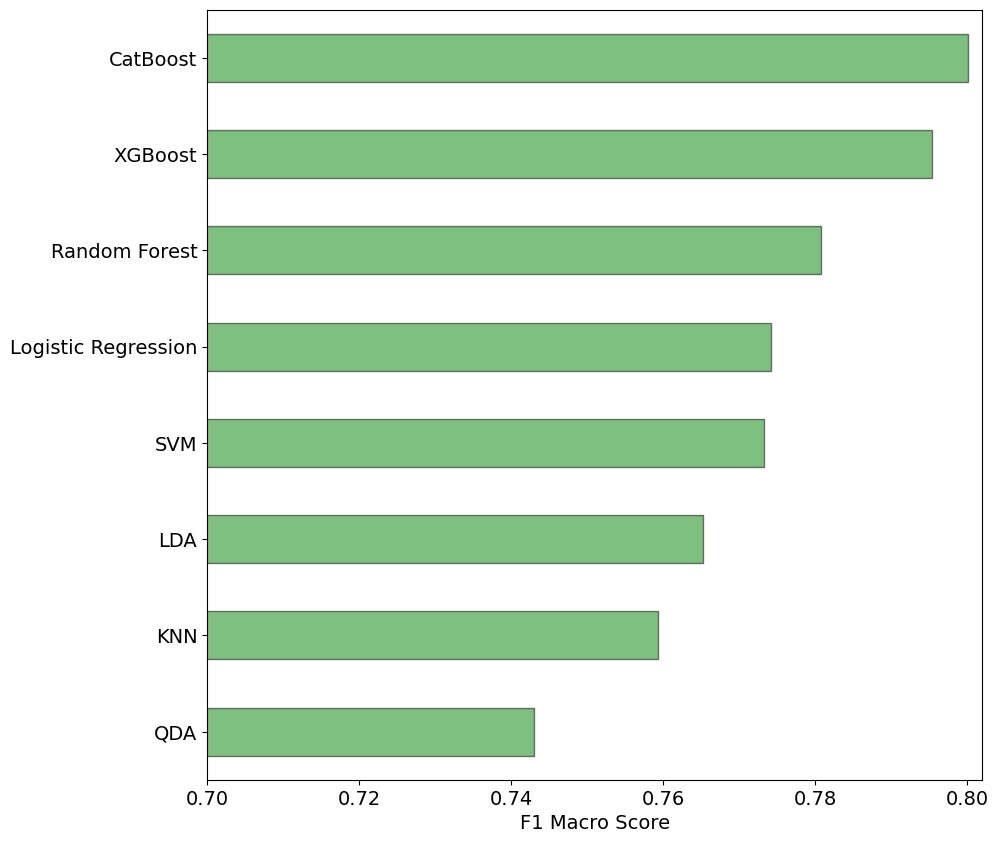

In [5]:
model_names = {
    'nb': 'Naive Bayes',
    'lda': 'LDA',
    'qda': 'QDA',
    'knn': 'KNN',
    'logreg': 'Logistic Regression',
    'svm': 'SVM',
    'rf': 'Random Forest',
    'xgb': 'XGBoost',
    'catboost': 'CatBoost',
}

best_f1 = pd.read_csv('./results/cv20_results.csv', index_col=0)

best_f1.index = [model_names[i] for i in best_f1.index]

best_f1.sort_values(by='f1_macro', inplace=True)
best_f1[1:].plot.barh(y='f1_macro', figsize=(10, 10), xlim=(0.7, 0.802), legend=False,
                      fontsize=14, color='green', alpha=0.5, edgecolor='black')
plt.xlabel('F1 Macro Score', fontsize=14)